In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
from pathlib import Path

import sys
sys.path.append('../../')

import phys_ml.visualization.vertex_visualization as vertvis
from phys_ml.evaluation import vertex as verteval
from phys_ml.load_data.vertex import *
from phys_ml.trainer.vertex import *

In [5]:
n = 38800
f'{n // 3600}h {n % 3600 // 60}m {n % 60}s'

'10h 46m 40s'

In [ ]:
info_fn = 'eval_info.pkl'
info = verteval.load_info_dict(info_fn)
sample_count = int((2000 * 576 * 3) / (24 * 6))
trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                            subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                            config_kwargs={'path_train': '../../../frgs_6d', 'hidden_dims': [128, 64, 32],
                                    	   'sample_count_per_vertex': sample_count, 'test_ratio': 0.2, 
                                           'subset': -1, 'subset_shuffle': True, 'strategy': 'auto'})

In [3]:
###############    TEST RUN    ################
info_fn = 'eval_info_test.pkl'
info = verteval.load_info_dict(info_fn)
trainer = VertexTrainer24x6(project_name='vertex_24x6', config_name='confmod_auto_encoder.json', 
                            subconfig_name='AUTO_ENCODER_VERTEX_24X6', 
                            config_kwargs={'path_train': '../../../frgs_6d', 'hidden_dims': [128, 64, 32],
                                    	   'sample_count_per_vertex': 2000, 'test_ratio': 0.33, 'epochs': 5,
                                           'subset': 3, 'subset_shuffle': False, 'strategy': 'auto'})

## train

In [62]:
# back_up existing info_files
verteval.backup_info(info_fn)

In [4]:
verteval.eval_train(trainer, info, info_fn, [128, 64, 32], resume=True, version=1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


 >>> Load checkpoint from 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_1\checkpoints\epoch=2-step=603.ckpt'
 >>> Loaded checkpoint


c:\Users\Sebastian\venv\ml24_1\Lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:654: Checkpoint directory c:\OneDrive - TU Wien\Studium\Master_5. Semester\Masters thesis\code\PhysML\saves\vertex_24x6\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\version_1\checkpoints exists and is not empty.
Restoring states from the checkpoint path at c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_1\checkpoints\epoch=2-step=603.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 32.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
32.6 K    Trainable params
0         Non-trainable params
32.6 K    Total params
0.130     Total estimated model params size (MB

Epoch 3: 100%|██████████| 201/201 [00:10<00:00, 19.23it/s, v_num=1, val_loss=1.270]

Epoch 3, global step 804: 'val_loss' reached 1.27261 (best 1.27261), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_1\\checkpoints\\epoch=3-step=804.ckpt' as top 10


Epoch 4: 100%|██████████| 201/201 [00:02<00:00, 90.43it/s, v_num=1, val_loss=1.110] 

Epoch 4, global step 1005: 'val_loss' reached 1.11420 (best 1.11420), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_1\\checkpoints\\epoch=4-step=1005.ckpt' as top 10
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 201/201 [00:02<00:00, 89.86it/s, v_num=1, val_loss=1.110]
>>> dim: 32
>>> save_path: 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_1'


In [8]:
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 16])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.6 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.6 K    Trainable params
0         Non-trainable params
33.6 K    Total params
0.135     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 201/201 [00:09<00:00, 20.67it/s, v_num=2, val_loss=2.350]

Epoch 0, global step 201: 'val_loss' reached 2.35138 (best 2.35138), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_2\\checkpoints\\epoch=0-step=201.ckpt' as top 10


Epoch 1: 100%|██████████| 201/201 [00:02<00:00, 85.31it/s, v_num=2, val_loss=2.000] 

Epoch 1, global step 402: 'val_loss' reached 1.99988 (best 1.99988), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_2\\checkpoints\\epoch=1-step=402.ckpt' as top 10


Epoch 2: 100%|██████████| 201/201 [00:02<00:00, 86.27it/s, v_num=2, val_loss=1.790] 

Epoch 2, global step 603: 'val_loss' reached 1.79083 (best 1.79083), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_2\\checkpoints\\epoch=2-step=603.ckpt' as top 10


Epoch 3: 100%|██████████| 201/201 [00:02<00:00, 86.84it/s, v_num=2, val_loss=1.720] 

Epoch 3, global step 804: 'val_loss' reached 1.71969 (best 1.71969), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_2\\checkpoints\\epoch=3-step=804.ckpt' as top 10


Epoch 4: 100%|██████████| 201/201 [00:02<00:00, 80.11it/s, v_num=2, val_loss=1.710] 

Epoch 4, global step 1005: 'val_loss' reached 1.70706 (best 1.70706), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_2\\checkpoints\\epoch=4-step=1005.ckpt' as top 10
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 201/201 [00:02<00:00, 79.47it/s, v_num=2, val_loss=1.710]
>>> dim: 16
>>> save_path: "c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_2"


In [9]:
verteval.eval_train(trainer, info, info_fn, [128, 64, 32, 8])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 33.1 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
33.1 K    Trainable params
0         Non-trainable params
33.1 K    Total params
0.132     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 201/201 [00:09<00:00, 20.32it/s, v_num=3, val_loss=2.390]

Epoch 0, global step 201: 'val_loss' reached 2.39264 (best 2.39264), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_3\\checkpoints\\epoch=0-step=201.ckpt' as top 10


Epoch 1: 100%|██████████| 201/201 [00:02<00:00, 89.06it/s, v_num=3, val_loss=2.040] 

Epoch 1, global step 402: 'val_loss' reached 2.04144 (best 2.04144), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_3\\checkpoints\\epoch=1-step=402.ckpt' as top 10


Epoch 2: 100%|██████████| 201/201 [00:02<00:00, 87.26it/s, v_num=3, val_loss=1.810] 

Epoch 2, global step 603: 'val_loss' reached 1.81154 (best 1.81154), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_3\\checkpoints\\epoch=2-step=603.ckpt' as top 10


Epoch 3: 100%|██████████| 201/201 [00:02<00:00, 86.38it/s, v_num=3, val_loss=1.720] 

Epoch 3, global step 804: 'val_loss' reached 1.72069 (best 1.72069), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_3\\checkpoints\\epoch=3-step=804.ckpt' as top 10


Epoch 4: 100%|██████████| 201/201 [00:02<00:00, 89.27it/s, v_num=3, val_loss=1.710] 

Epoch 4, global step 1005: 'val_loss' reached 1.70986 (best 1.70986), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_3\\checkpoints\\epoch=4-step=1005.ckpt' as top 10
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 201/201 [00:02<00:00, 88.60it/s, v_num=3, val_loss=1.710]
>>> dim: 8
>>> save_path: "c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_3"


In [10]:
verteval.eval_train(trainer, info, info_fn, [128, 32, 16, 4])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type              | Params | Mode 
--------------------------------------------------------
0 | model     | AutoEncoderVertex | 24.7 K | train
1 | criterion | MSELoss           | 0      | train
--------------------------------------------------------
24.7 K    Trainable params
0         Non-trainable params
24.7 K    Total params
0.099     Total estimated model params size (MB)
13        Modules in train mode
0         Modules in eval mode


Epoch 0: 100%|██████████| 201/201 [00:10<00:00, 19.70it/s, v_num=4, val_loss=13.80]

Epoch 0, global step 201: 'val_loss' reached 13.79368 (best 13.79368), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_4\\checkpoints\\epoch=0-step=201.ckpt' as top 10


Epoch 1: 100%|██████████| 201/201 [00:02<00:00, 85.01it/s, v_num=4, val_loss=12.80] 

Epoch 1, global step 402: 'val_loss' reached 12.84740 (best 12.84740), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_4\\checkpoints\\epoch=1-step=402.ckpt' as top 10


Epoch 2: 100%|██████████| 201/201 [00:02<00:00, 79.13it/s, v_num=4, val_loss=11.30] 

Epoch 2, global step 603: 'val_loss' reached 11.27792 (best 11.27792), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_4\\checkpoints\\epoch=2-step=603.ckpt' as top 10


Epoch 3: 100%|██████████| 201/201 [00:02<00:00, 75.38it/s, v_num=4, val_loss=9.200]

Epoch 3, global step 804: 'val_loss' reached 9.20418 (best 9.20418), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_4\\checkpoints\\epoch=3-step=804.ckpt' as top 10


Epoch 4: 100%|██████████| 201/201 [00:02<00:00, 77.00it/s, v_num=4, val_loss=6.930] 

Epoch 4, global step 1005: 'val_loss' reached 6.92693 (best 6.92693), saving model to 'c:\\OneDrive - TU Wien\\Studium\\Master_5. Semester\\Masters thesis\\code\\PhysML\\saves\\vertex_24x6\\save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17\\version_4\\checkpoints\\epoch=4-step=1005.ckpt' as top 10
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 201/201 [00:02<00:00, 76.45it/s, v_num=4, val_loss=6.930]
>>> dim: 4
>>> save_path: "c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_4"


## evaluate prediction

In [12]:
i = 18
axis = trainer.config.construction_axis
k, other_k = (axis + 1) // 2, 3
slice_idx_3d = i * 24 + i
nrows, ncols = 2, 3

test_file = 'tp0.020000_mu0.080000.h5'
test_file3d = '../../../frgs/' + test_file
test_file6d = '../../../frgs_6d/' + test_file

info = verteval.load_info_dict(info_fn)

vertex3 = AutoEncoderVertexDataset.load_from_file(test_file3d)
vertex6 = AutoEncoderVertex24x6Dataset.load_from_file(test_file6d)

NameError: name 'trainer' is not defined

### predict 24x24 slice

 >>> Load checkpoint from 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_1\checkpoints\epoch=4-step=1005.ckpt'


100%|██████████| 24/24 [00:00<00:00, 1142.84it/s]


 >>> Load checkpoint from 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_2\checkpoints\epoch=4-step=1005.ckpt'


100%|██████████| 24/24 [00:00<00:00, 666.71it/s]

 >>> Load checkpoint from 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_3\checkpoints\epoch=4-step=1005.ckpt'



100%|██████████| 24/24 [00:00<00:00, 800.00it/s]


 >>> Load checkpoint from 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_4\checkpoints\epoch=4-step=1005.ckpt'


100%|██████████| 24/24 [00:00<00:00, 827.57it/s]


RESULTS:
   latent_dim=32: RMSE=0.8995
   latent_dim=16: RMSE=1.0679
   latent_dim=8: RMSE=1.0785
   latent_dim=4: RMSE=2.0714


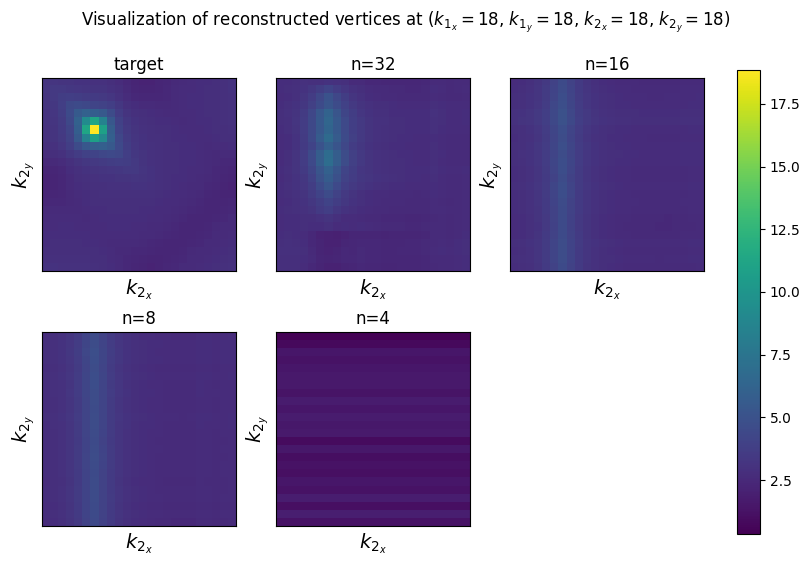

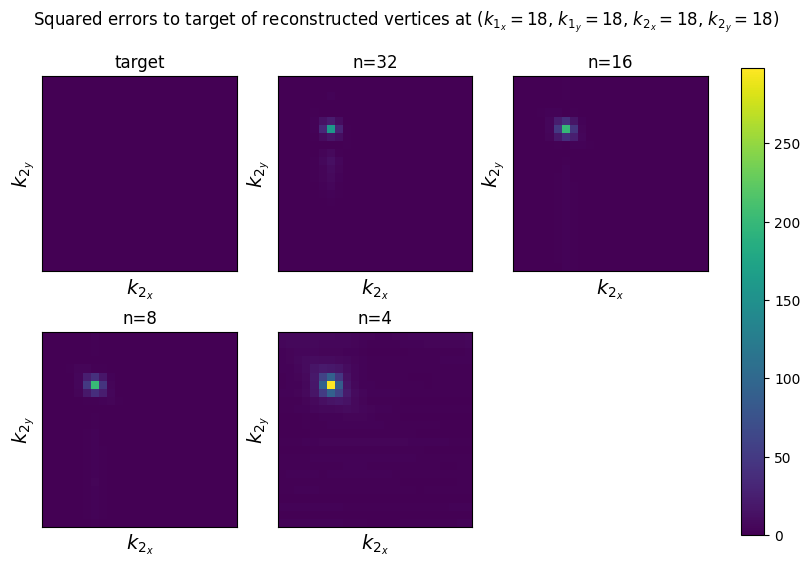

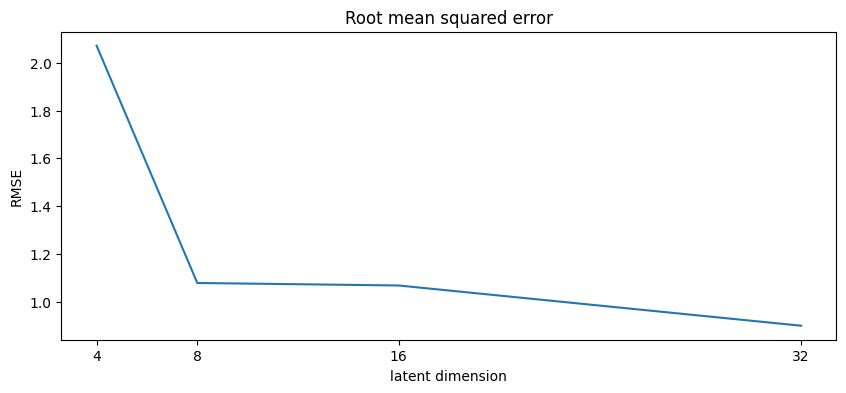

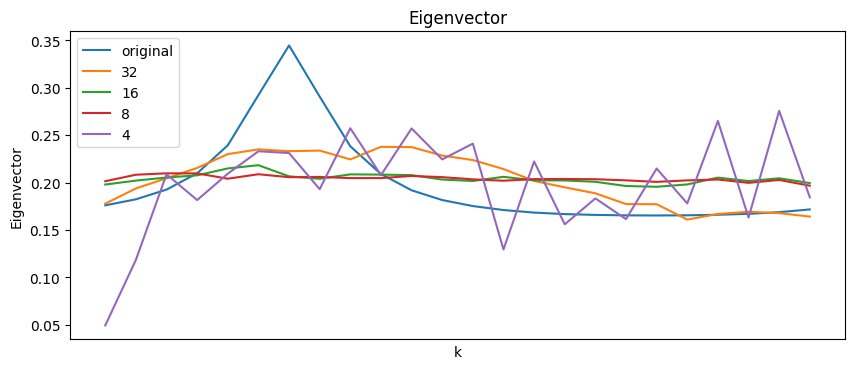

In [23]:
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i, i, i), axis, nrows, ncols, 
                             trainer.predict_slice2d, fixed_idcs=(i, i, i, i))

### predict 576x576 slice

 >>> Load checkpoint from 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_1\checkpoints\epoch=4-step=1005.ckpt'


100%|██████████| 13824/13824 [00:12<00:00, 1107.35it/s]


 >>> Load checkpoint from 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_2\checkpoints\epoch=4-step=1005.ckpt'


100%|██████████| 13824/13824 [00:15<00:00, 894.16it/s]


 >>> Load checkpoint from 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_3\checkpoints\epoch=4-step=1005.ckpt'


100%|██████████| 13824/13824 [00:15<00:00, 886.10it/s]


 >>> Load checkpoint from 'c:/OneDrive - TU Wien/Studium/Master_5. Semester/Masters thesis/code/PhysML/saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-17/version_4\checkpoints\epoch=4-step=1005.ckpt'


100%|██████████| 13824/13824 [00:15<00:00, 889.24it/s]



RESULTS:
   latent_dim=32: RMSE=1.0235
   latent_dim=16: RMSE=1.3251
   latent_dim=8: RMSE=1.3344
   latent_dim=4: RMSE=2.5773


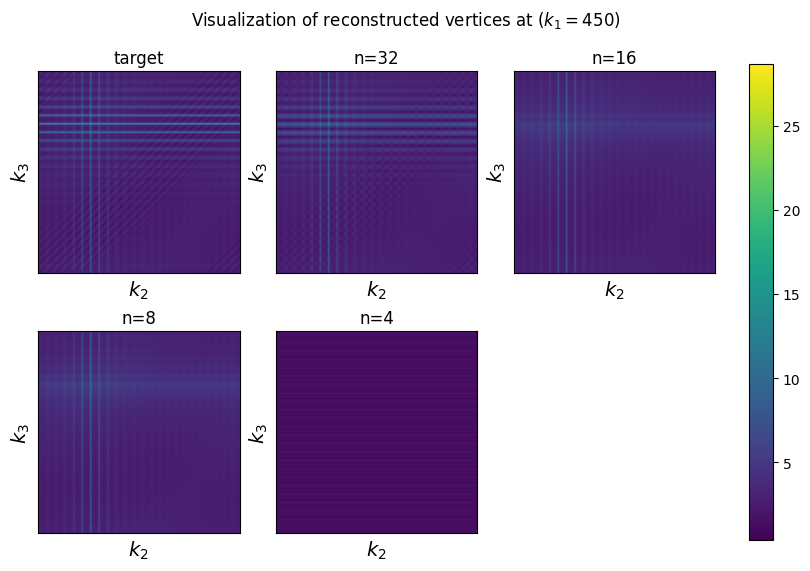

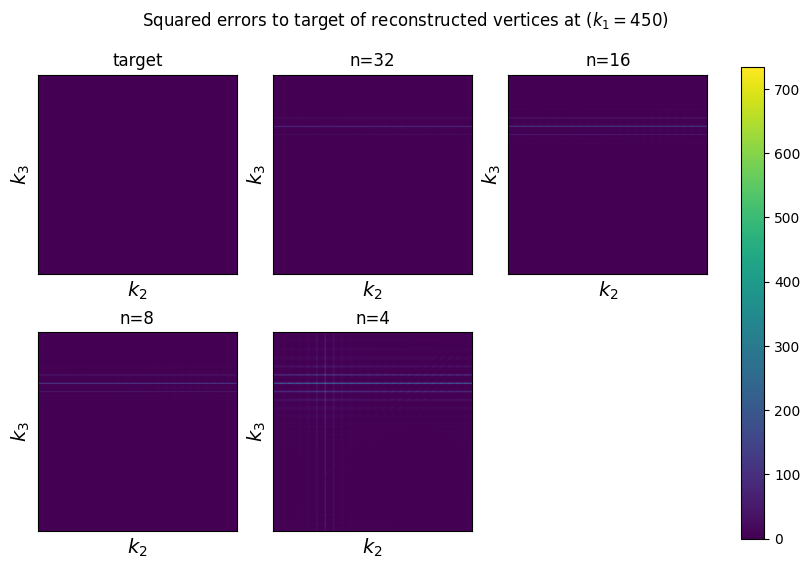

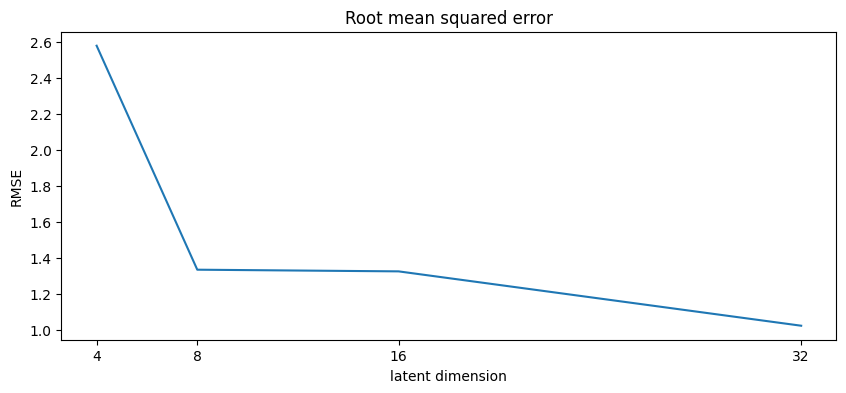

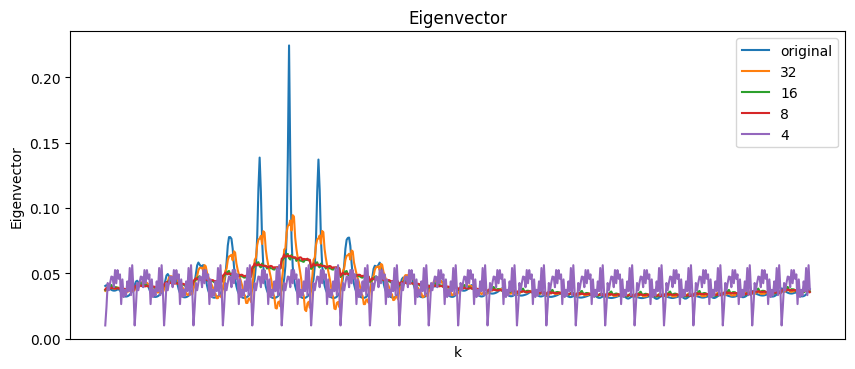

In [24]:
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, (i, i), (k, other_k), nrows, ncols, 
                             trainer.predict_slice4d, fixed_idcs=(i, i), other_k=other_k)

### predict full vertex

In [ ]:
# RESULTS FOR 6-DIMENSIONAL PREDICTION
# for 6d-data
slice_at = (i, i, i, i)
verteval.evaluate_and_report(info, test_file6d, trainer, vertex6, slice_at, axis, nrows, ncols, 
                             predict_func=trainer.predict)

In [ ]:
# for 3d-data
slice_at = slice_idx_3d
verteval.evaluate_and_report(info, test_file3d, trainer, vertex3, slice_at, axis, nrows, ncols, 
                             load_func=trainer.load_prediction)

In [ ]:
[{'hidden_dims': [128, 64, 32],
  'latent_dim': 32,
  'save_path': '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_5'},
 {'hidden_dims': [128, 64, 32, 16],
  'latent_dim': 16,
  'save_path': '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-18/version_6'},
 {'hidden_dims': [128, 64, 32, 8],
  'latent_dim': 8,
  'save_path': '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_0'},
 {'hidden_dims': [128, 32, 16, 4],
  'latent_dim': 4,
  'save_path': '/gpfs/data/fs71925/shepp123/PhysML/notebooks/vertex/../../saves/vertex_24x6/save_AUTO_ENCODER_VERTEX_24X6_BS20_2025-01-19/version_1'}]

### predict latent dimension

In [ ]:
model_path = info[1]['save_path']
ld = trainer.predict(test_file6d, vertex6, TrainerModes.JUPYTER, load_from=model_path, encode_only=True)

fname = Path(test_file6d).stem
vertvis.plot_section(ld, axis, slice_idx_3d, title=f"Latent space for '{fname}'")

In [ ]:
from tqdm.notebook import tqdm

from phys_ml.load_data.vertex import AutoEncoderVertex24x6Dataset


model_path = info[1]['save_path']
file_paths = glob.glob(f"../../../frgs_6d/*.h5")
encoded_vertices = []
for file_path in tqdm(file_paths):
    vertex = AutoEncoderVertex24x6Dataset.load_from_file(file_path)
    ld = trainer.predict(file_path, vertex, TrainerModes.JUPYTER, load_from=model_path, encode_only=True)
    encoded_vertices.append(ld)

## correlation analysis

load files:   0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]

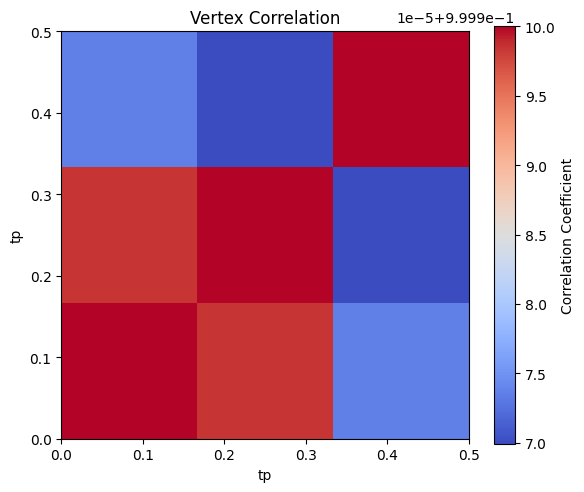

In [11]:
cor_mat = verteval.vertex_correlation('../../../frgs_6d', pre_load_vertices=True)
vertvis.plot_correlation(cor_mat, "Vertex Correlation")